#**Matthew Ding Housing and Rent EDA**
This project will analyze and visualize data from housing prices and rent data within NY, and give insights for the question: Is it better to buy a house with mortgage or rent?

##Setup and Import

In [8]:
'''This project will analyze and compare housing prices in NY with renting prices, served to answer the question: Is it worth it to buy or rent?'''

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Original code for downloading datasets are edited and removed for public access. For credit, the datasets used in this project are https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market and https://www.kaggle.com/datasets/ivanchvez/ny-rental-properties-pricing/data

In [9]:
#Load dfs
rent_url = "https://raw.githubusercontent.com/Md905908324/NY-Housing-and-Rent-EDA/main/NY-Rent-Dataset.csv"
house_url = "https://raw.githubusercontent.com/Md905908324/NY-Housing-and-Rent-EDA/main/NY-House-Dataset.csv"
rent_df = pd.read_csv(rent_url)
house_df = pd.read_csv(house_url)

print("Rent Dataset:")
print(rent_df.head())
print("\nHousing Dataset:")
print(house_df.head())

Rent Dataset:
   F1    id       neighbourhood  latitude  longitude        room_type  price  \
0   0  2595             Midtown  40.75362  -73.98377  Entire home/apt    225   
1   1  3831            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
2   2  5099           Manhattan  40.74767  -73.97500  Entire home/apt    200   
3   3  5121  Bedford-Stuyvesant  40.68688  -73.95596     Private room     60   
4   4  5178           Manhattan  40.76489  -73.98493     Private room     79   

   days_occupied_in_2019  minimum_nights  number_of_reviews  \
0                     15              10                 48   
1                    188               1                295   
2                    362               3                 78   
3                      0              29                 49   
4                    141               2                454   

   reviews_per_month  availability_2020  
0               0.39                  1  
1               4.67                  1  


##Housing Price Code and Analysis (6 Main Visualizations)

---



In [ ]:
house_df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


In [ ]:
#Filter by price of the house < 10 million, beds < 10, and bath < 10.
filtered_house_df = house_df[house_df['PRICE'] < 10000000]
filtered_house_df = filtered_house_df[filtered_house_df['BEDS'] < 10]
filtered_house_df = filtered_house_df[filtered_house_df['BATH'] < 10]
filtered_house_df = filtered_house_df[filtered_house_df['PROPERTYSQFT'] < 10000]
filtered_house_df = filtered_house_df[~filtered_house_df['TYPE'].isin(['Contingent', 'Land for sale', 'Foreclosure', 'Pending', 'Coming Soon', 'Mobile house for sale', 'Condop for sale'])] #Remove types unfit for analysis or with minimal data
filtered_house_df['SUBLOCALITY'] = filtered_house_df['SUBLOCALITY'].str.replace(' County', '') #remove county for better merging
filtered_house_df['SUBLOCALITY'] = filtered_house_df['SUBLOCALITY'].str.replace('The Bronx', 'Bronx') #remove borough for better merging
filtered_house_df = filtered_house_df.drop(columns=['ADMINISTRATIVE_AREA_LEVEL_2', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'MAIN_ADDRESS','LOCALITY','LATITUDE','LONGITUDE']) #remove unnecessary columns and those with bad formatting
filtered_house_df = filtered_house_df.reset_index(drop=True)
filtered_house_df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,SUBLOCALITY
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",Manhattan
1,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",Richmond
2,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York
3,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238",Kings
4,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York
...,...,...,...,...,...,...,...,...,...
4133,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York
4134,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",Queens
4135,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York
4136,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens


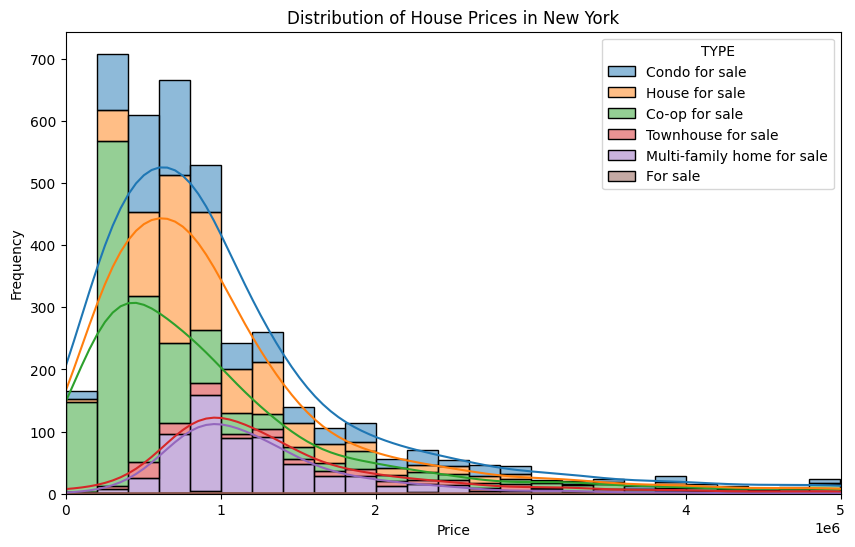

In [ ]:
#1. Raw distribution of Housing Prices by type, limit to 5 mil, 50 bins
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_house_df, x='PRICE', hue='TYPE', bins=50, kde=True, multiple="stack")
plt.title('Distribution of House Prices in New York')
plt.xlim(0, 5000000)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

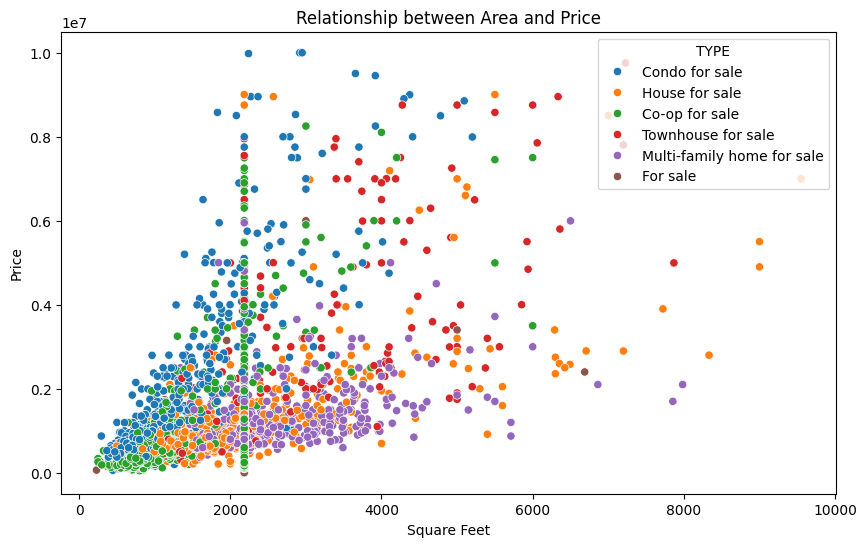

In [ ]:
#2. Graph to show Impact of Area Size by price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_house_df, x='PROPERTYSQFT', y='PRICE', hue = 'TYPE')
plt.title('Relationship between Area and Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

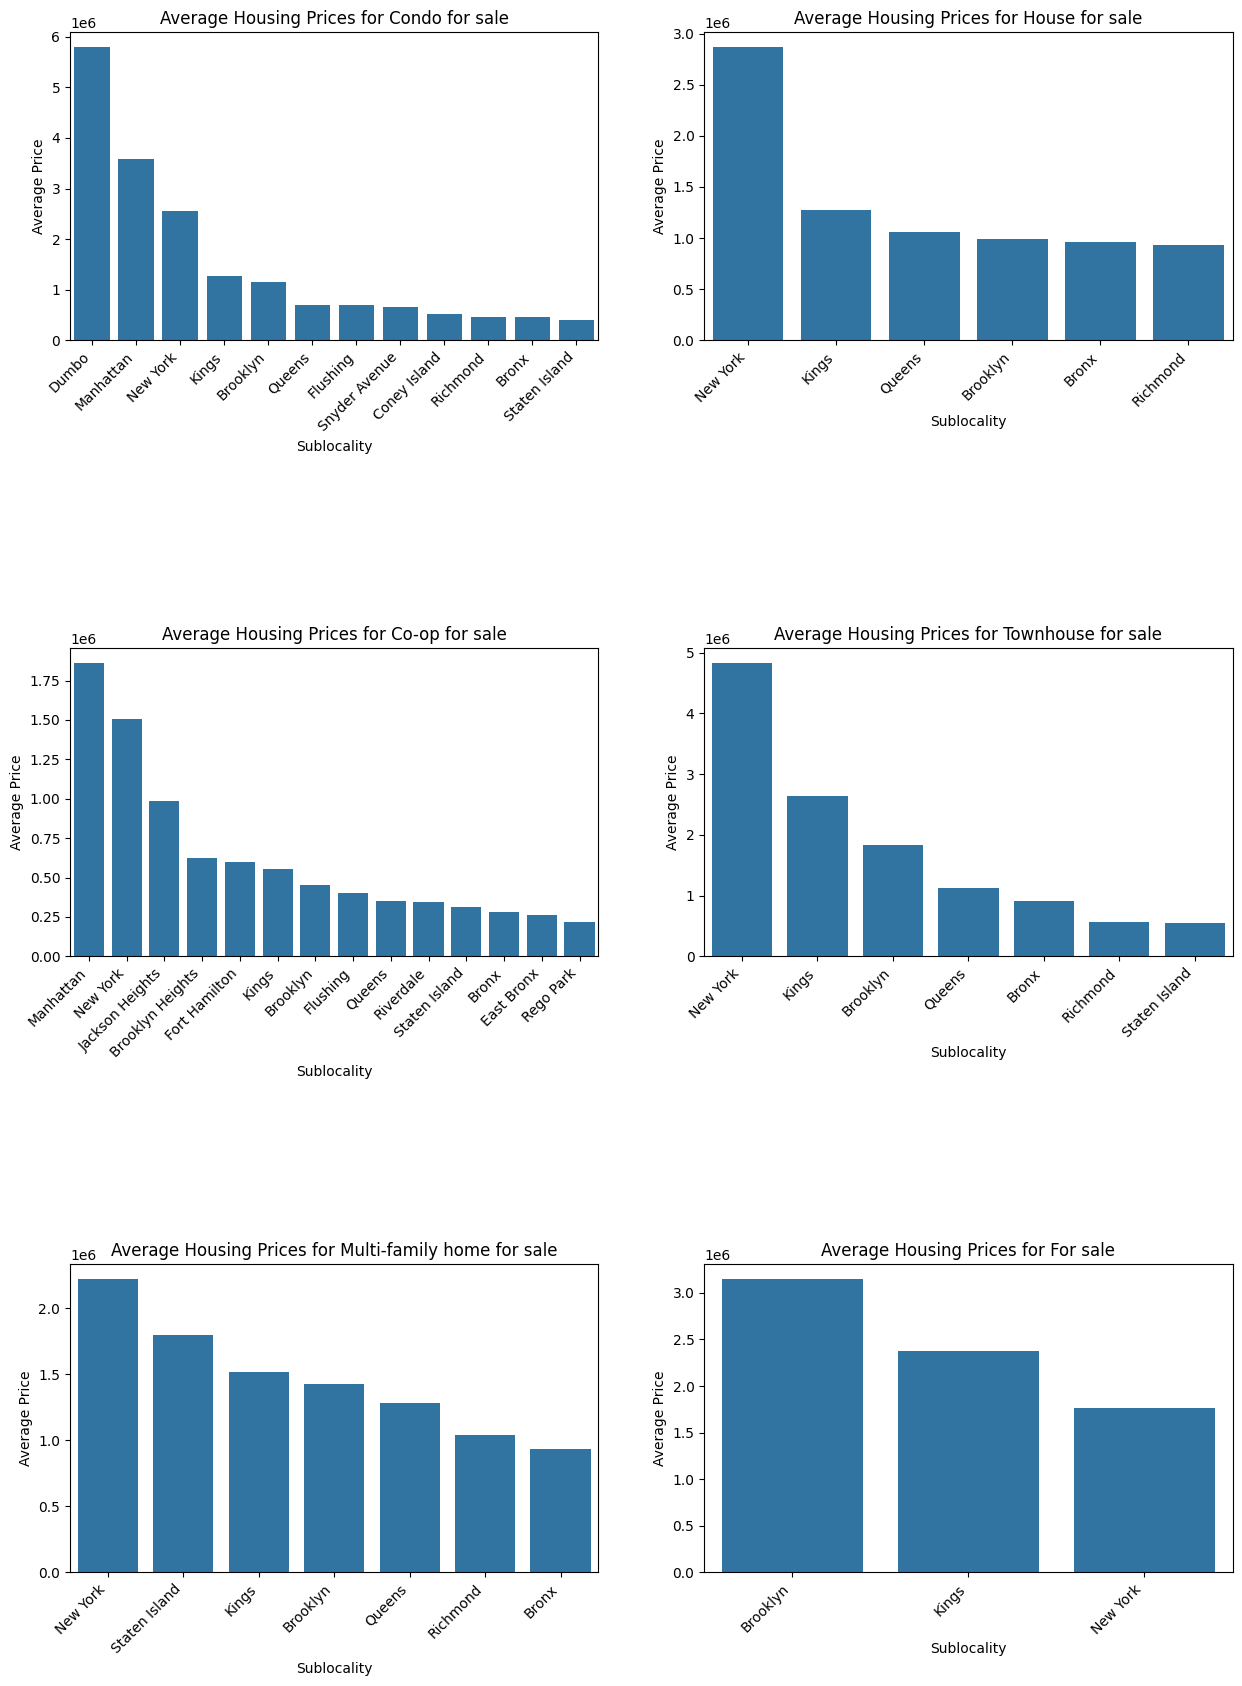

In [ ]:
#3. Graph of average housing prices by sublocality, grid by type

#make subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 20)) #make 3x2 subplots
plt.subplots_adjust(hspace=1)  # Add some space between
housing_types = filtered_house_df['TYPE'].unique() #get the 6 types into a array
axes_list = []  # Make a axes list for one of each subplot
for subaxes in axes:
    for axe in subaxes:
        axes_list.append(axe)  # Append each of the axes to the list

for i, housing_type in enumerate(housing_types): #make a bar plot for each type
    type_data = filtered_house_df[filtered_house_df['TYPE'] == housing_type]
    sublocality_prices = type_data.groupby('SUBLOCALITY')['PRICE'].mean().sort_values(ascending=False) #group by sublocality and find mean, and sort desc, and make it into a series
    sns.barplot(x=sublocality_prices.index, y=sublocality_prices.values, ax=axes_list[i]) #plot each type with each own plot
    axes_list[i].set_title(f'Average Housing Prices for {housing_type}')
    axes_list[i].set_xlabel('Sublocality')
    axes_list[i].set_ylabel('Average Price')
    plt.setp(axes_list[i].get_xticklabels(), rotation=45, ha="right") #make it 45 degrees with ha right

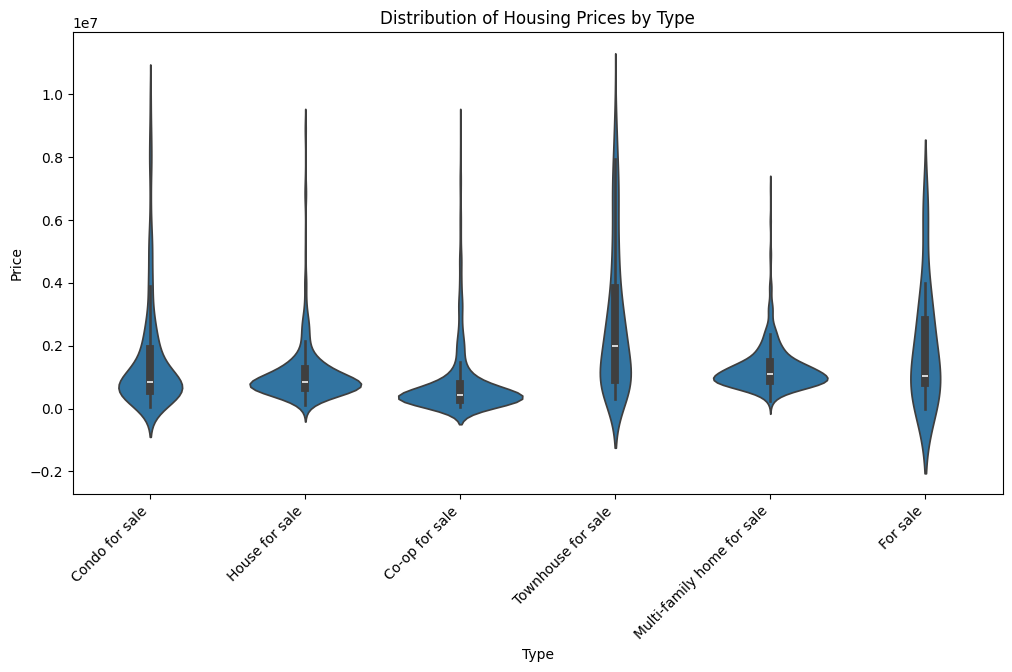

In [ ]:
#4. Violin Plot of housing prices by type
plt.figure(figsize=(12, 6))
sns.violinplot(x='TYPE', y='PRICE', data=filtered_house_df)
plt.title('Distribution of Housing Prices by Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

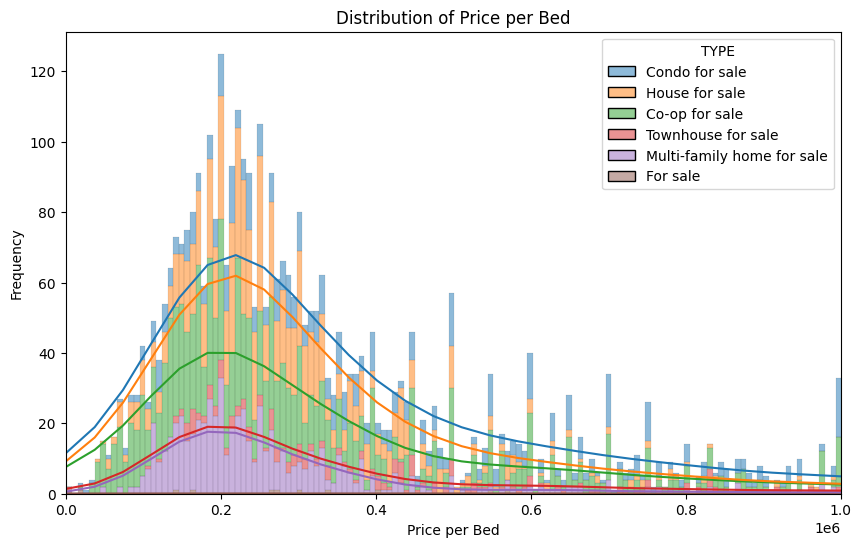

In [ ]:
#5. Price per bed by type

filtered_house_df['price_per_bed'] = filtered_house_df['PRICE'] / filtered_house_df['BEDS'] #make a price per bed column

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_house_df, x='price_per_bed', hue='TYPE', bins=1000, kde=True, multiple = 'stack') # Adjust the number of bins as needed
plt.title('Distribution of Price per Bed')
plt.xlabel('Price per Bed')
plt.ylabel('Frequency')
plt.xlim(0, 1000000)
plt.show()

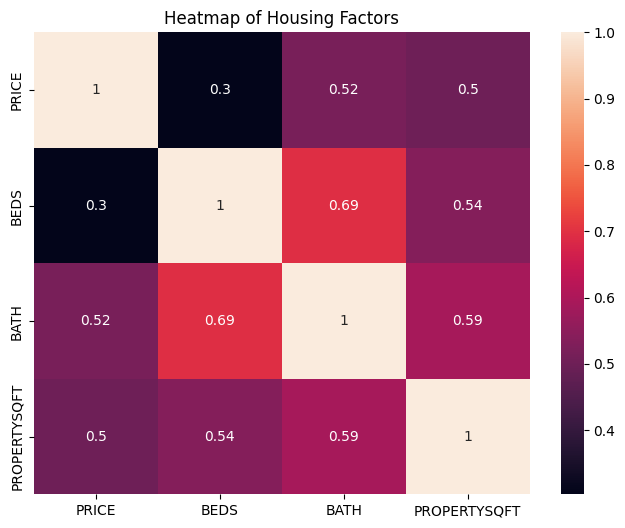

In [ ]:
#6 Heatmap of price, beds, bath, and area
factors = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']  # Select relevant columns
heatmap_corr_matrix = filtered_house_df[factors].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr_matrix, annot=True)
plt.title('Heatmap of Housing Factors')
plt.show()

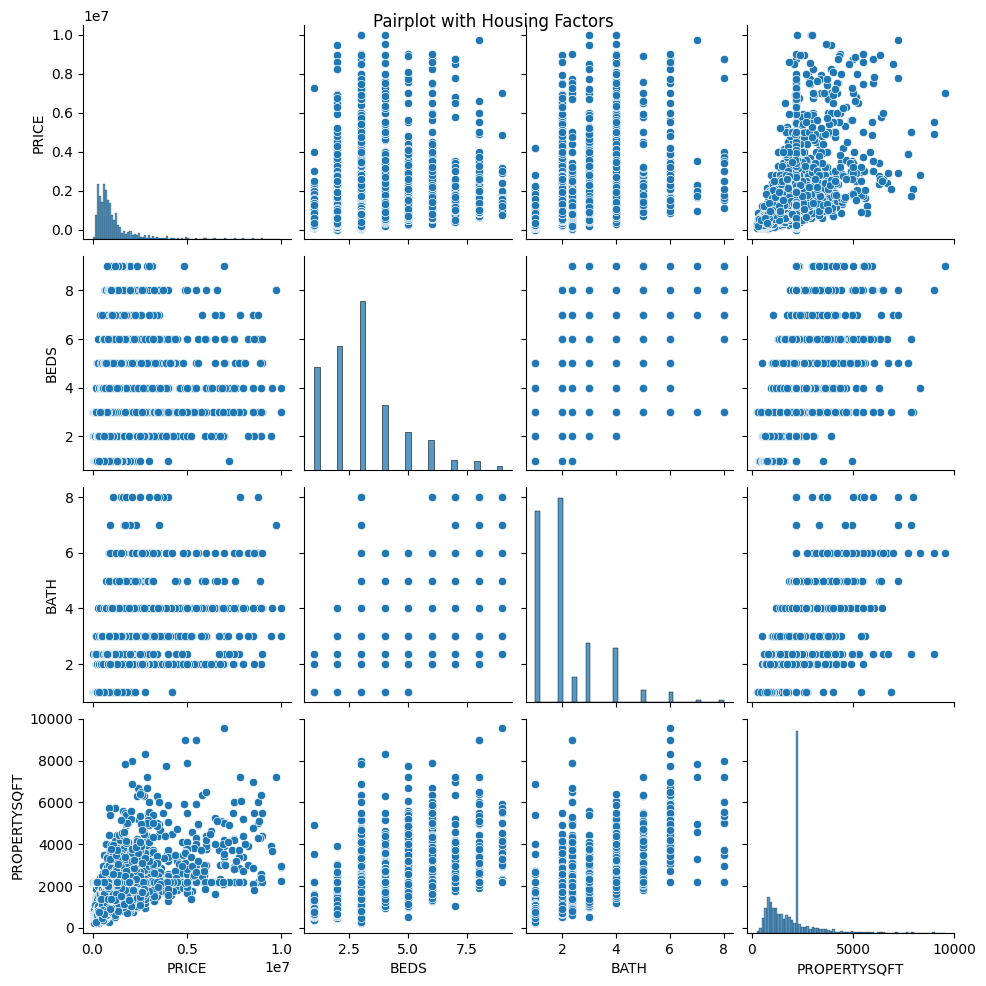

In [ ]:
#Miscellaneous Pairplot
sns.pairplot(filtered_house_df[factors])
plt.suptitle('Pairplot with Housing Factors')
plt.show()

##Now, moving on to rent (5 Main Visualizations)











In [ ]:
rent_df

,F1,id,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242
...,...,...,...,...,...,...,...,...,...,...,...,...
17609,28313,23691588,Brooklyn,40.69312,-73.94073,Shared room,32,9,31,5,0.26,1
17610,17415,14712466,Brooklyn,40.65446,-73.92613,Shared room,99,7,100,1,0.03,0
17611,27827,23184420,Lower East Side,40.71172,-73.98864,Shared room,41,14,180,2,0.12,365
17612,29127,24555212,Manhattan,40.71113,-73.98840,Shared room,38,0,180,1,0.27,365


In [ ]:
#Fix and add new columns to rent_df
filtered_rent_df = rent_df[rent_df['days_occupied_in_2019'] > 30] #only ones that are successfully occupied for more than a month
filtered_rent_df = filtered_rent_df.rename(columns={'price': 'daily_price'}) # Rename price to daily price
filtered_rent_df = filtered_rent_df.rename(columns={'neighbourhood': 'neighborhood'}) #change to american english
filtered_rent_df['monthly_price'] = filtered_rent_df['daily_price']*30 #make a monthly price for better calculation
filtered_rent_df = filtered_rent_df.drop(columns=['latitude', 'longitude', 'minimum_nights', 'availability_2020'])
filtered_rent_df

,F1,id,neighborhood,room_type,daily_price,days_occupied_in_2019,number_of_reviews,reviews_per_month,monthly_price
1,1,3831,Brooklyn,Entire home/apt,89,188,295,4.67,2670
2,2,5099,Manhattan,Entire home/apt,200,362,78,0.60,6000
4,4,5178,Manhattan,Private room,79,141,454,3.52,2370
5,6,5238,Lower East Side,Entire home/apt,150,86,161,1.29,4500
6,7,5441,Manhattan,Private room,85,323,204,1.56,2550
...,...,...,...,...,...,...,...,...,...
17601,15165,13045435,Manhattan,Shared room,40,204,27,0.63,1200
17604,15164,13045257,Upper East Side,Shared room,40,76,25,0.58,1200
17605,15160,13044964,Upper East Side,Shared room,40,125,21,0.49,1200
17606,15166,13045531,Upper East Side,Shared room,40,241,24,0.56,1200


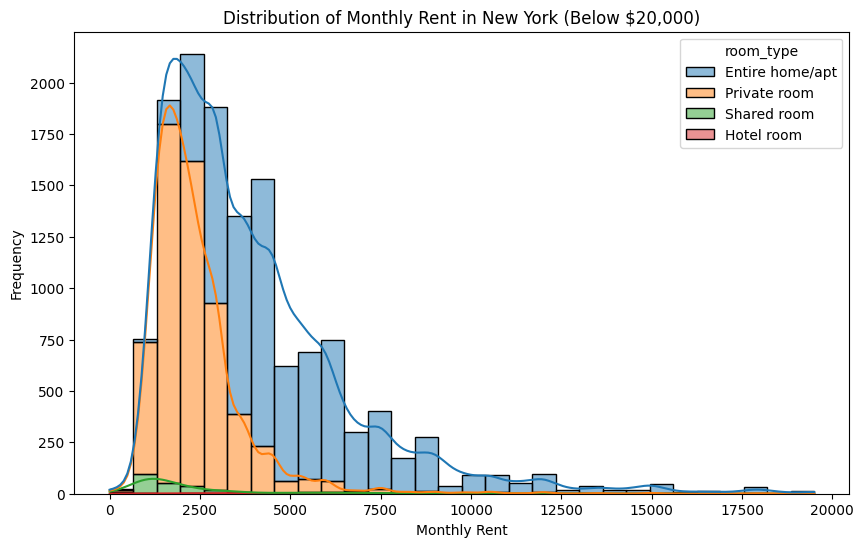

In [ ]:
#1. Distribution of Monthy rent in NY below 20000 a month
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_rent_df[filtered_rent_df['monthly_price'] < 20000], x='monthly_price', hue='room_type', bins=30, kde=True, multiple="stack")
plt.title('Distribution of Monthly Rent in New York (Below $20,000)')
plt.xlabel('Monthly Rent')
plt.ylabel('Frequency')
plt.show()

In [ ]:
neighborhood_counts = filtered_rent_df['neighborhood'].value_counts()
filtered_counts = neighborhood_counts[neighborhood_counts > 50]
neighborhood_filtered_rent_df = filtered_rent_df[filtered_rent_df['neighborhood'].isin(filtered_counts.index)]
neighborhood_filtered_rent_df['neighborhood'].value_counts()

,count
neighborhood,
Brooklyn,3009
Manhattan,2565
Queens,766
Bedford-Stuyvesant,604
Harlem,525
Williamsburg,516
Midtown,307
Bushwick,287
Upper West Side,227


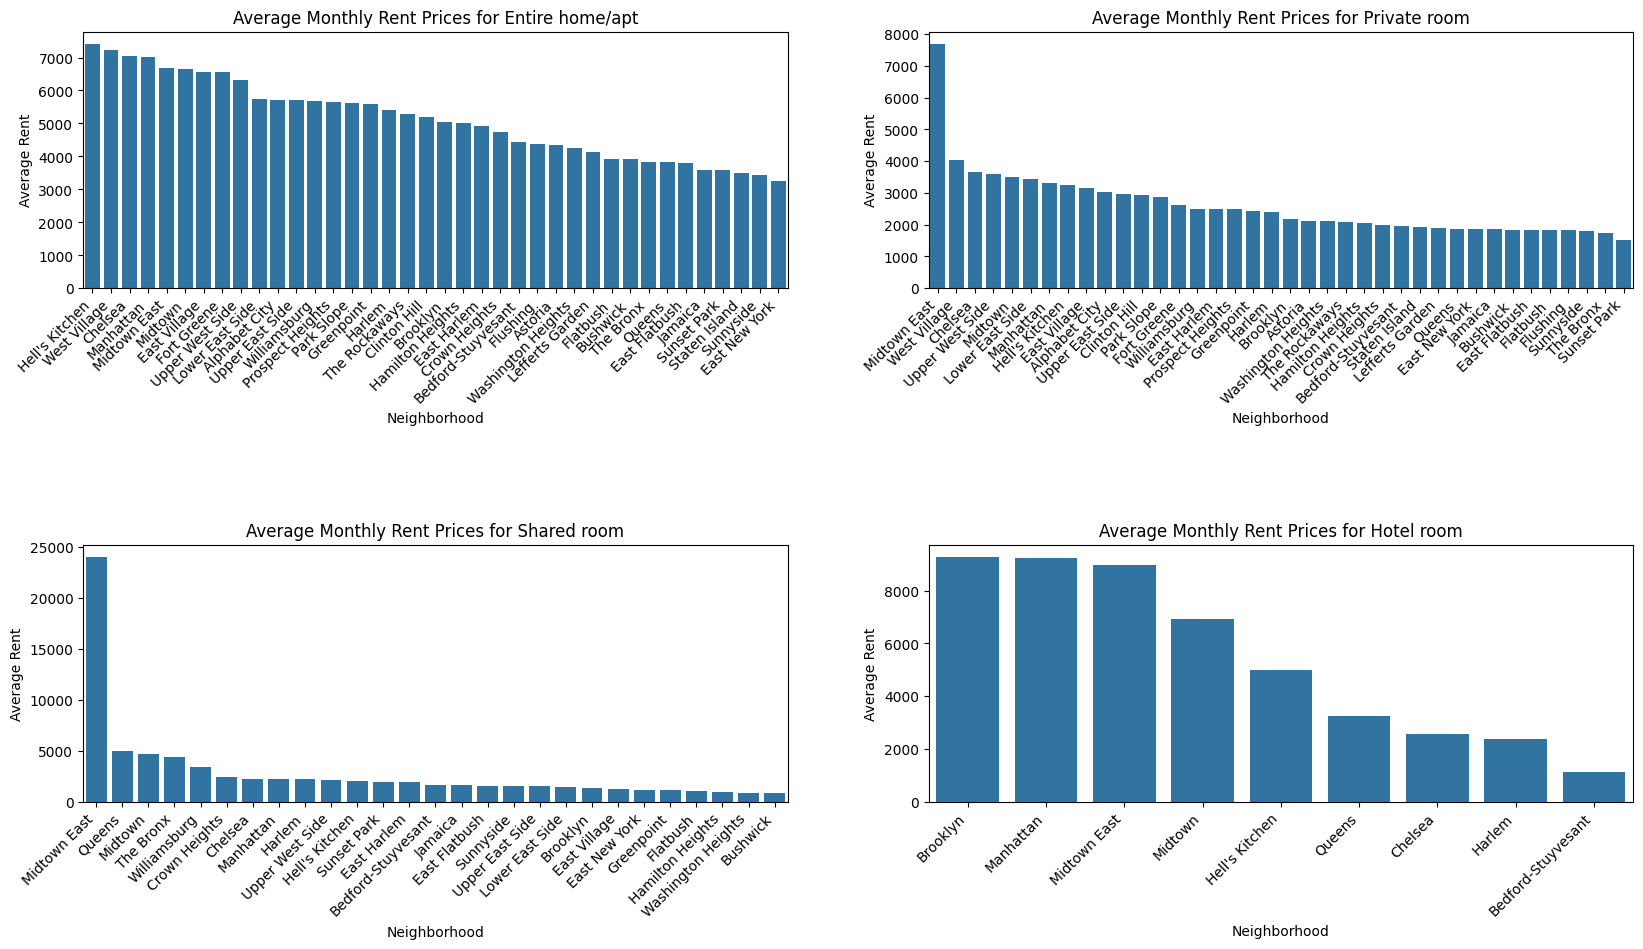

In [ ]:
#2. Monthly rent by neighborhood with count > 50, grid by type
room_types = neighborhood_filtered_rent_df['room_type'].unique() #get all room types
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(hspace=1)
axes_list = []
for subaxes in axes:
    for axe in subaxes:
        axes_list.append(axe)  # Append each of the axes to the list

for i, room_type in enumerate(room_types): #for each room type
    type_data = neighborhood_filtered_rent_df[neighborhood_filtered_rent_df['room_type'] == room_type] #gets data for room type
    neighborhood_rents = type_data.groupby('neighborhood')['monthly_price'].mean().sort_values(ascending=False) #group by neighborhood and get average rent
    sns.barplot(x=neighborhood_rents.index, y=neighborhood_rents.values, ax=axes_list[i])
    axes_list[i].set_title(f'Average Monthly Rent Prices for {room_type}')
    axes_list[i].set_xlabel('Neighborhood')
    axes_list[i].set_ylabel('Average Rent')
    plt.setp(axes_list[i].get_xticklabels(), rotation=45, ha="right") #make it 45 degrees with ha right

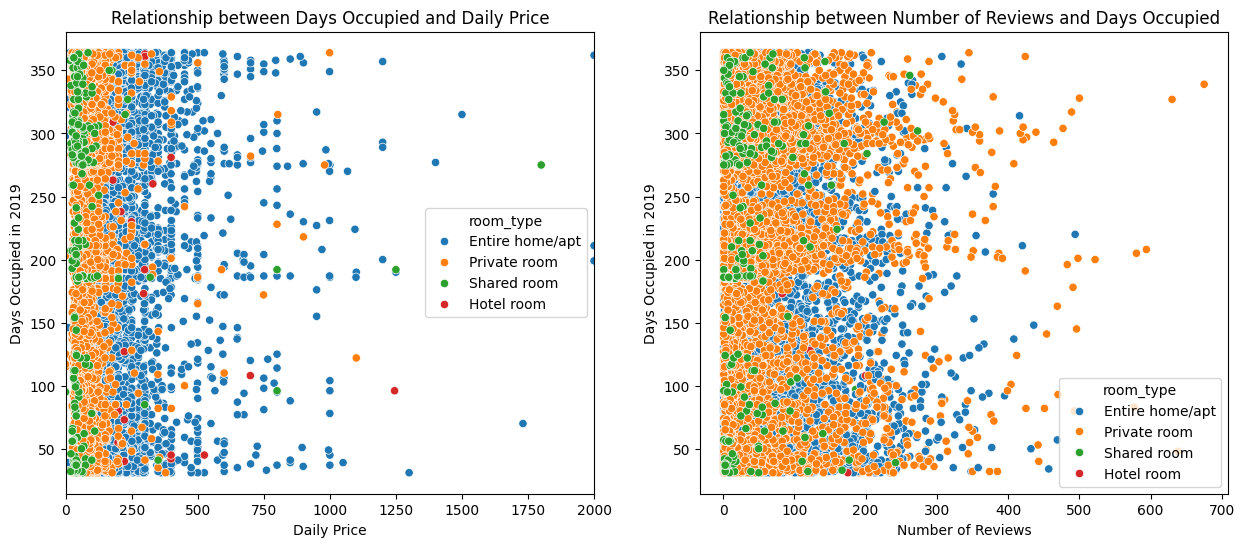

In [ ]:
#3 Scatterplots of days occupied vs # reviews and daily price, hue by room type

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  #create 2 subplots

# Subplot 1: daily prices vs days occupied
sns.scatterplot(x='daily_price', y='days_occupied_in_2019', hue='room_type', data=filtered_rent_df, ax=axes[0])  # Swapped x and y
axes[0].set_title('Relationship between Days Occupied and Daily Price')
axes[0].set_xlabel('Daily Price')
axes[0].set_ylabel('Days Occupied in 2019')
axes[0].set_xlim(0, 2000)
# subplot 2: number of reviews vs days occupied
sns.scatterplot(x='number_of_reviews', y='days_occupied_in_2019', hue='room_type', data=filtered_rent_df, ax=axes[1])  # Swapped x and y
axes[1].set_title('Relationship between Number of Reviews and Days Occupied')
axes[1].set_xlabel('Number of Reviews')
axes[1].set_ylabel('Days Occupied in 2019')
plt.show()

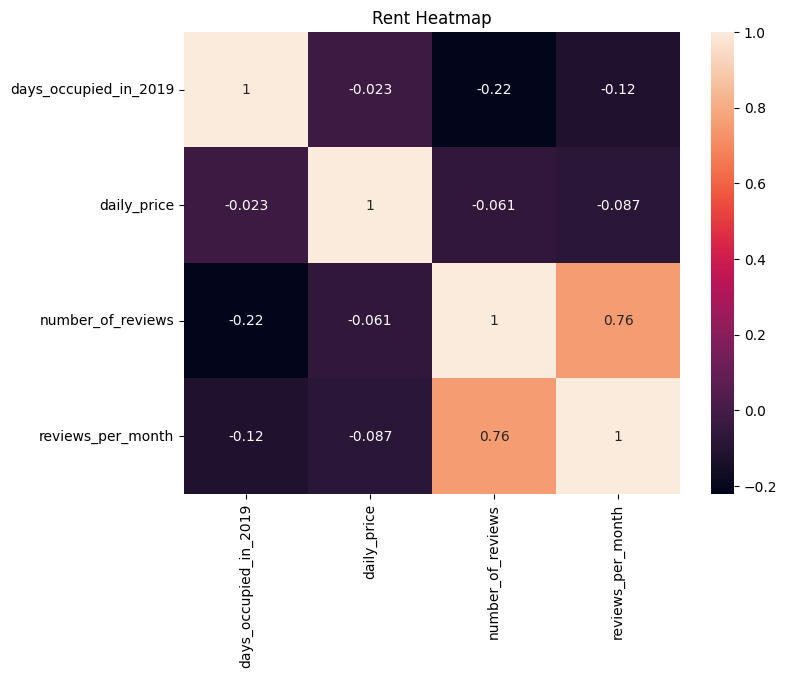

In [ ]:
#Define factors wanted and create a correlation matrix
factors_rent = filtered_rent_df[['days_occupied_in_2019', 'daily_price', 'number_of_reviews', 'reviews_per_month']]
heatmap_corr_matrix_rent = factors_rent.corr()

#Make a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr_matrix_rent, annot=True)
plt.title('Rent Heatmap')
plt.show()

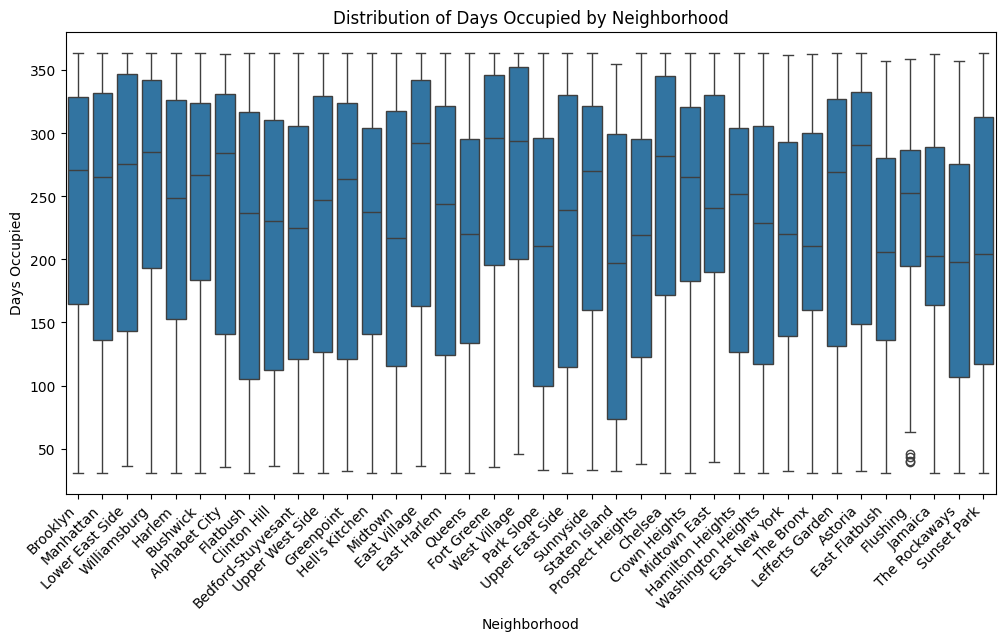

In [ ]:
#4 Boxplot of Days Occupied by neighboorhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighborhood', y='days_occupied_in_2019', data=neighborhood_filtered_rent_df)
plt.title('Distribution of Days Occupied by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Days Occupied')
plt.xticks(rotation=45, ha='right')
plt.show()

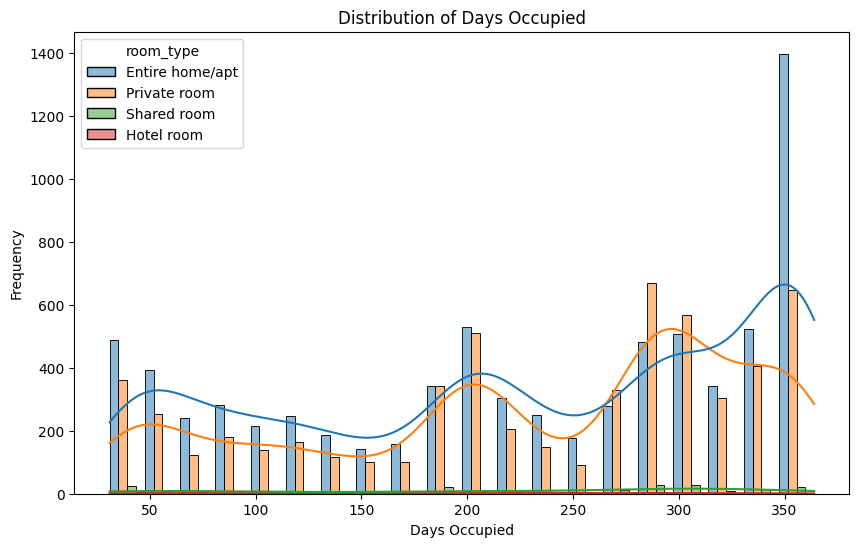

In [ ]:
#5 Distribution of Days occupied
plt.figure(figsize=(10, 6))
sns.histplot(x='days_occupied_in_2019', data=filtered_rent_df, bins=20, hue='room_type', multiple='dodge', kde = True)
plt.title('Distribution of Days Occupied')
plt.xlabel('Days Occupied')
plt.ylabel('Frequency')
plt.show()

##Finally, compare housing prices to rent prices (2 Main Visualizations)

###Define variables and methodology for analysis
1. Monthly price for housing will be tax (~12.5%) + average interest payment (will be shown below, assume 30 yr mortgage)
2. Compare monthly price for housing vs monthly rent

In [ ]:
def average_interest_payment(value_of_house):
    loan_term_years = 30 #assume 30 years of mortgage, can be modified
    mortgage_rate = 6.72 #Current average mortgage rate, can be modified
    interest_rate = mortgage_rate / 100 / 12 #average rate per month
    loan_term = loan_term_years * 12 #number of months total

    monthly_payment = value_of_house * (interest_rate * (1 + interest_rate) ** loan_term) / ((1 + interest_rate) ** loan_term - 1) # Calculate the monthly payment using the formula
    total_paid = monthly_payment * loan_term #total amount paid in mortgage life
    total_interest = total_paid - value_of_house #total interest

    # Calculate the average interest payment per month
    average_interest_per_month = total_interest / loan_term

    return average_interest_per_month #amount paid monthly

In [ ]:
def average_tax_payment(value_of_house, tax_rate=2.0): #monthly tax payments, average tax for NY ~2%
    annual_tax_payment = value_of_house * (tax_rate / 100) #annual tax
    monthly_tax_payment = annual_tax_payment / 12 #monthly tax
    return monthly_tax_payment

In [ ]:
filtered_house_df['average_interest'] = filtered_house_df['PRICE'].apply(average_interest_payment) #make a new column with average interest
filtered_house_df['average_tax'] = filtered_house_df['PRICE'].apply(average_tax_payment) #make a new column with average tax
filtered_house_df['average_monthly_price'] = filtered_house_df['average_interest'] + filtered_house_df['average_tax'] #make a new column with monthly price
filtered_house_df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,SUBLOCALITY,average_interest,average_tax,average_monthly_price
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",Manhattan,1161.806336,525.000000,1686.806336
1,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",Richmond,958.951262,433.333333,1392.284595
2,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,254.490912,115.000000,369.490912
3,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238",Kings,2544.909118,1150.000000,3694.909118
4,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York,3317.602538,1499.166667,4816.769205
...,...,...,...,...,...,...,...,...,...,...,...,...
4133,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York,2209.276176,998.333333,3207.609510
4134,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",Queens,903.627151,408.333333,1311.960484
4135,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,4702.549457,2125.000000,6827.549457
4136,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens,2206.048936,996.875000,3202.923936


In [ ]:
#Find and adjust Sublocality and Neighborhood to be merged.
filtered_house_df['SUBLOCALITY'].value_counts()

,count
SUBLOCALITY,
Queens,1129
New York,1079
Kings,614
Bronx,449
Brooklyn,418
Richmond,369
Staten Island,43
Manhattan,19
Flushing,4


In [ ]:
#Find the common columns for merging
house_sublocalities = filtered_house_df['SUBLOCALITY'].unique()
rent_neighborhoods = filtered_rent_df['neighborhood'].unique()
common_values = np.intersect1d(house_sublocalities, rent_neighborhoods)
common_values

array(['Brooklyn', 'Brooklyn Heights', 'Coney Island', 'Flushing',
       'Jackson Heights', 'Manhattan', 'Queens', 'Rego Park', 'Riverdale',
       'Staten Island', 'The Bronx'], dtype=object)

In [ ]:
#Non-common columns to edit or ignore
house_not_in_rent = list(set(house_sublocalities) - set(rent_neighborhoods))
rent_not_in_house = list(set(rent_neighborhoods) - set(house_sublocalities))
print(house_not_in_rent)
print(rent_not_in_house)

house_sublocalities = filtered_house_df['SUBLOCALITY'].unique() #refresh common values
rent_neighborhoods = filtered_rent_df['neighborhood'].unique()
common_values = np.intersect1d(house_sublocalities, rent_neighborhoods)
common_values

['Bronx', 'Dumbo', 'New York', 'Richmond', 'Kings', 'Snyder Avenue', 'Fort Hamilton', 'East Bronx']
['Elm Park', 'Bedford-Stuyvesant', 'Grymes Hill', 'Fort Greene', 'Soundview', 'Prospect Heights', 'Wakefield', 'Dongan Hills', 'The Rockaways', 'Tribeca', 'Glendale', 'Tremont', 'Jamaica', 'Cobble Hill', 'Civic Center', 'Rosebank', 'Stapleton', 'Park Versailles', 'South Beach', 'Greenridge', 'Battery Park City', 'Castle Hill', 'St. George', 'Morris Heights', 'Murray Hill', 'Chinatown', 'Country Club', 'Annadale', 'Howard Beach', 'Longwood', 'The Bronx', 'Dyker Heights', 'Tompkinsville', 'Pelham Bay', 'Astoria', 'Flatlands', 'Lefferts Garden', 'Sunnyside', 'Alphabet City', 'Flatbush', 'Bath Beach', 'Kew Garden Hills', 'Washington Heights', 'Williamsburg', 'Morningside Heights', 'Ozone Park', 'West Village', 'Mount Eden', 'Parkchester', 'Kingsbridge Heights', 'Canarsie', 'East Flatbush', 'Hudson Square', 'Forest Hills', 'Melrose', 'South Ozone Park', 'University Heights', 'Flatiron Distric

array(['Brooklyn', 'Brooklyn Heights', 'Coney Island', 'Flushing',
       'Jackson Heights', 'Manhattan', 'Queens', 'Rego Park', 'Riverdale',
       'Staten Island'], dtype=object)

In [ ]:
all_housing_stats = []
for sublocality in house_sublocalities: #for each sublocality, get the information from describe
    sublocality_df = filtered_house_df[filtered_house_df['SUBLOCALITY'] == sublocality]
    stats = sublocality_df.describe().T
    stats['SUBLOCALITY'] = sublocality
    all_housing_stats.append(stats)     #append the stats dataframe to the list

housing_stats = pd.concat(all_housing_stats).reset_index() #concat all the dataframes in the list
housing_stats

,index,count,mean,std,min,25%,50%,75%,max,SUBLOCALITY
0,PRICE,19.0,3.039368e+06,2.548471e+06,315000.000000,1000000.000000,2.795000e+06,3.995000e+06,9.975000e+06,Manhattan
1,BEDS,19.0,2.052632e+00,8.481145e-01,1.000000,1.000000,2.000000e+00,3.000000e+00,3.000000e+00,Manhattan
2,BATH,19.0,2.105263e+00,9.941348e-01,1.000000,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,Manhattan
3,PROPERTYSQFT,19.0,1.804182e+03,5.206474e+02,679.000000,1397.000000,2.054000e+03,2.184208e+03,2.456000e+03,Manhattan
4,average_interest,19.0,1.121002e+04,9.399459e+03,1161.806336,3688.274084,1.030873e+04,1.473465e+04,3.679053e+04,Manhattan
...,...,...,...,...,...,...,...,...,...,...
121,BATH,1.0,1.000000e+00,NaN,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,Snyder Avenue
122,PROPERTYSQFT,1.0,1.050000e+03,NaN,1050.000000,1050.000000,1.050000e+03,1.050000e+03,1.050000e+03,Snyder Avenue
123,average_interest,1.0,2.397378e+03,NaN,2397.378154,2397.378154,2.397378e+03,2.397378e+03,2.397378e+03,Snyder Avenue
124,average_tax,1.0,1.083333e+03,NaN,1083.333333,1083.333333,1.083333e+03,1.083333e+03,1.083333e+03,Snyder Avenue


In [ ]:
all_rent_stats = []
for neighborhood in rent_neighborhoods:  # for each rent neighborhoods, get describe data
    neighborhood_df = filtered_rent_df[filtered_rent_df['neighborhood'] == neighborhood]
    stats = neighborhood_df.describe().T
    stats['neighborhood'] = neighborhood
    all_rent_stats.append(stats) #add the dataframe to the list

rent_stats = pd.concat(all_rent_stats).reset_index() #concat everything into one df
rent_stats

,index,count,mean,std,min,25%,50%,75%,max,neighborhood
0,F1,3009.0,1.906686e+04,1.081337e+04,1.00,9321.00,20505.00,28799.00,35592.00,Brooklyn
1,id,3009.0,1.617531e+07,9.476612e+06,3831.00,7652936.00,17731252.00,24194478.00,30562589.00,Brooklyn
2,daily_price,3009.0,1.257850e+02,9.529239e+01,0.00,65.00,100.00,150.00,1095.00,Brooklyn
3,days_occupied_in_2019,3009.0,2.366760e+02,1.043520e+02,31.00,165.00,271.00,329.00,364.00,Brooklyn
4,number_of_reviews,3009.0,5.669392e+01,6.338627e+01,1.00,10.00,34.00,82.00,439.00,Brooklyn
...,...,...,...,...,...,...,...,...,...,...
1262,daily_price,1.0,2.500000e+01,NaN,25.00,25.00,25.00,25.00,25.00,Van Nest
1263,days_occupied_in_2019,1.0,1.740000e+02,NaN,174.00,174.00,174.00,174.00,174.00,Van Nest
1264,number_of_reviews,1.0,7.000000e+00,NaN,7.00,7.00,7.00,7.00,7.00,Van Nest
1265,reviews_per_month,1.0,1.700000e-01,NaN,0.17,0.17,0.17,0.17,0.17,Van Nest


In [ ]:
house_price_df = housing_stats[housing_stats['index'] == 'average_monthly_price']  # gets price row from housing stats
rent_price_df = rent_stats[rent_stats['index'] == 'monthly_price']  # gets price row from rent stats

#rename all columns for beter merging
rent_price_df = rent_price_df.rename(columns={
    'index': 'rent_index',
    'count': 'rent_count',
    'mean': 'rent_mean',
    'std': 'rent_std',
    'min': 'rent_min',
    '25%': 'rent_25%',
    '50%': 'rent_median',
    '75%': 'rent_75%',
    'max': 'rent_max'
})
house_price_df = house_price_df.rename(columns={
    'index': 'house_index',
    'count': 'house_count',
    'mean': 'house_mean',
    'std': 'house_std',
    'min': 'house_min',
    '25%': 'house_25%',
    '50%': 'house_median',
    '75%': 'house_75%',
    'max': 'house_max'
})

rent_price_df = rent_price_df.rename(columns={'neighborhood': 'SUBLOCALITY'}) #rename into the same name
merged_df = pd.merge(house_price_df, rent_price_df, on='SUBLOCALITY', how='inner') #inner join the two dfs
merged_df = merged_df.drop(columns=['rent_index', 'house_index']) #drop the index
merged_df = merged_df.set_index('SUBLOCALITY') #make sublocality the first column
merged_df = merged_df.reset_index() #reset the index so sublocality becomes the first column
merged_df

,SUBLOCALITY,house_count,house_mean,house_std,house_min,house_25%,house_median,house_75%,house_max,rent_count,rent_mean,rent_std,rent_min,rent_25%,rent_median,rent_75%,rent_max
0,Manhattan,19.0,16275.637814,13646.910891,1686.806336,5354.940750,14967.059398,21392.988298,53415.533986,2565.0,5615.602339,9324.659513,750.0,2850.0,4350.0,6000.0,299970.0
1,Brooklyn,418.0,4299.253178,5120.691800,530.139134,1745.710685,2942.526555,4685.573157,50871.937129,3009.0,3773.549352,2858.771595,0.0,1950.0,3000.0,4500.0,32850.0
2,Queens,1129.0,4099.709484,3022.454047,535.494075,1820.674500,3474.756794,5296.036402,24097.233377,766.0,2684.138381,2522.122092,300.0,1500.0,2100.0,3000.0,54000.0
3,Staten Island,43.0,2272.308584,1615.444601,586.366012,1298.573132,2008.102781,2423.110690,9633.538410,62.0,2804.032258,1677.659826,930.0,1710.0,2250.0,3607.5,8250.0
4,Coney Island,3.0,2738.159704,507.741389,2297.269582,2460.595275,2623.920968,2958.604765,3293.288562,4.0,2962.500000,283.945417,2550.0,2887.5,3075.0,3150.0,3150.0
5,Brooklyn Heights,1.0,3346.837969,NaN,3346.837969,3346.837969,3346.837969,3346.837969,3346.837969,13.0,11289.230769,15129.443403,2700.0,5550.0,6000.0,9000.0,60000.0
6,Jackson Heights,1.0,5274.616639,NaN,5274.616639,5274.616639,5274.616639,5274.616639,5274.616639,38.0,2537.368421,1390.546624,930.0,1500.0,2100.0,3225.0,6750.0
7,Riverdale,4.0,1858.164440,523.726711,1258.411076,1499.383410,1938.488552,2297.269582,2297.269582,5.0,3018.000000,1456.252039,1500.0,2070.0,2370.0,4500.0,4650.0
8,Rego Park,1.0,1151.312261,NaN,1151.312261,1151.312261,1151.312261,1151.312261,1151.312261,7.0,2048.571429,900.119040,900.0,1350.0,2070.0,2700.0,3270.0
9,Flushing,4.0,2548.951797,960.740644,1601.127284,1878.245468,2425.788160,3096.494489,3743.103585,85.0,2508.705882,1899.810008,1140.0,1500.0,1800.0,2700.0,11940.0


In [ ]:
#melt the merged df to plot it
melted_df = pd.melt(merged_df, id_vars=['SUBLOCALITY'], value_vars=['house_mean', 'rent_mean','rent_median','house_median'], var_name='Price Type', value_name='Price')
melted_df = melted_df.sort_values(by='SUBLOCALITY').reset_index(drop = True)
melted_df

,SUBLOCALITY,Price Type,Price
0,Brooklyn,house_mean,4299.253178
1,Brooklyn,house_median,2942.526555
2,Brooklyn,rent_median,3000.000000
3,Brooklyn,rent_mean,3773.549352
4,Brooklyn Heights,house_median,3346.837969
5,Brooklyn Heights,house_mean,3346.837969
6,Brooklyn Heights,rent_median,6000.000000
7,Brooklyn Heights,rent_mean,11289.230769
8,Coney Island,house_median,2623.920968
9,Coney Island,house_mean,2738.159704


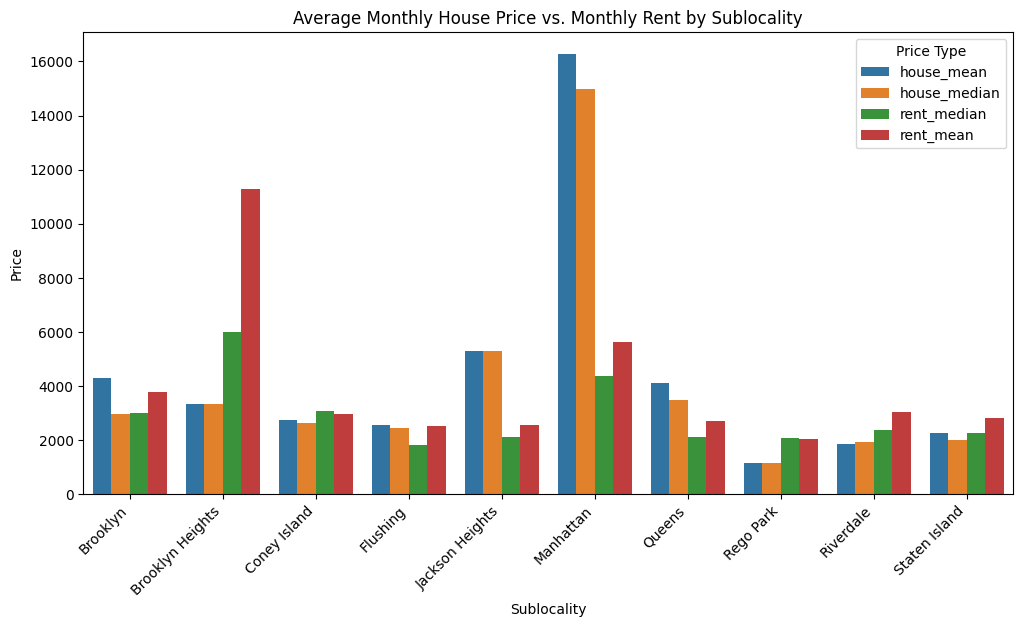

In [ ]:
#1 Compare monthly house price with monthly rent by sublocality, includes mean and median
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='SUBLOCALITY', y='Price', hue='Price Type', data=melted_df)
plt.title('Average Monthly House Price vs. Monthly Rent by Sublocality')
plt.xlabel('Sublocality')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type')  # Add a legend to distinguish between house and rent prices
plt.show()

In [ ]:
#2 Create barplots for 25%, 50% (median), 75%,
melted_df_2 = pd.melt(merged_df, id_vars=['SUBLOCALITY'], value_vars=['house_25%', 'house_75%', 'house_median','rent_25%', 'rent_75%','rent_median'], var_name='Price Type', value_name='Price')
melted_df_2 = melted_df_2.sort_values(by=['SUBLOCALITY', 'Price Type']).reset_index(drop=True)
melted_df_2

,SUBLOCALITY,Price Type,Price
0,Brooklyn,house_25%,1745.710685
1,Brooklyn,house_75%,4685.573157
2,Brooklyn,house_median,2942.526555
3,Brooklyn,rent_25%,1950.000000
4,Brooklyn,rent_75%,4500.000000
5,Brooklyn,rent_median,3000.000000
6,Brooklyn Heights,house_25%,3346.837969
7,Brooklyn Heights,house_75%,3346.837969
8,Brooklyn Heights,house_median,3346.837969
9,Brooklyn Heights,rent_25%,5550.000000


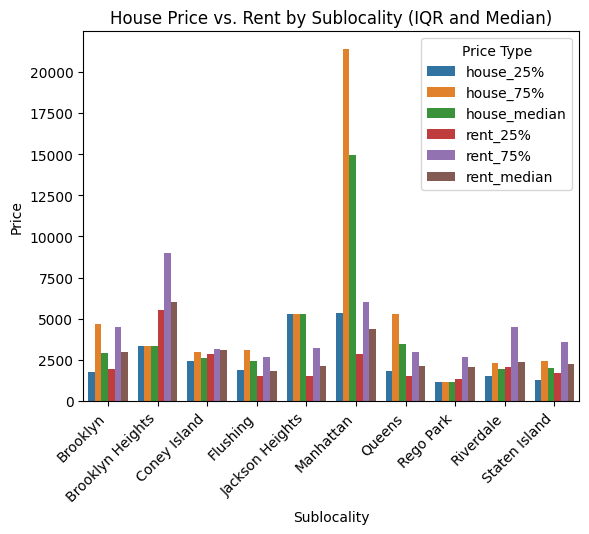

In [ ]:
sns.barplot(x='SUBLOCALITY', y='Price', hue='Price Type', data=melted_df_2)

plt.title('House Price vs. Rent by Sublocality (IQR and Median)')
plt.xlabel('Sublocality')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Type')  # Add a legend
plt.show()